<a href="https://colab.research.google.com/github/yasumorishima/mlb-data-analysis/blob/main/notebooks/mlb_home_run_race_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# 1) 必要なパッケージのインストール
# ============================
!pip install --quiet pybaseball bar_chart_race
!apt-get update --quiet && apt-get install -y ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 18.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/gra

In [ ]:


# ============================
# 2) ライブラリのインポート
# ============================
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pybaseball import statcast, playerid_reverse_lookup
import bar_chart_race as bcr
import matplotlib.animation as animation
from IPython.display import Video, HTML

# ============================
# 3) Statcastデータ取得（2024年3月20日～10月1日）
# ============================
print("Fetching Statcast data, this may take a moment...")
try:
    df = statcast(start_dt='2024-03-20', end_dt='2024-10-01')
except Exception as e:
    print(f"Error fetching Statcast data: {e}")
    sys.exit(1)

if df.empty:
    print("No Statcast data found for the specified period.")
    sys.exit(1)

print("\n--- df (Statcast data) ---")
print(df.head())
print("df shape:", df.shape)






Fetching Statcast data, this may take a moment...
This is a large query, it may take a moment to complete


/usr/local/lib/python3.11/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_co


--- df (Statcast data) ---
    pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
589         CH 2024-10-01           88.1          -1.65           6.12   
614         CH 2024-10-01           87.1          -1.69           6.17   
629         CH 2024-10-01           89.7          -1.89           6.14   
652         FF 2024-10-01           97.5          -1.51           6.32   
685         CH 2024-10-01           88.6          -1.77           6.19   

       player_name  batter  pitcher     events      description  ...  \
589  Brieske, Beau  518792   689225  field_out    hit_into_play  ...   
614  Brieske, Beau  518792   689225        NaN  swinging_strike  ...   
629  Brieske, Beau  518792   689225        NaN             ball  ...   
652  Brieske, Beau  518792   689225        NaN             foul  ...   
685  Brieske, Beau  518792   689225        NaN     blocked_ball  ...   

     n_thruorder_pitcher  n_priorpa_thisgame_player_at_bat  \
589                    1        


--- game_typeの内訳 ---
game_type
R    709510
S     20547
F      1063
Name: count, dtype: int64

--- df_hr (Home Run data) ---
    pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
458         CU 2024-09-30           86.4          -2.31           6.04   
380         FF 2024-09-30           94.7          -1.32           5.77   
38          FC 2024-09-30           89.2          -2.28           5.85   
161         SL 2024-09-30           83.9          -2.25           5.89   
63          FF 2024-09-29           90.3          -1.08           5.46   

          player_name  batter  pitcher    events    description  ...  \
458   Johnson, Pierce  596019   572955  home_run  hit_into_play  ...   
380  Iglesias, Raisel  607043   628452  home_run  hit_into_play  ...   
38      Megill, Tylor  657656   656731  home_run  hit_into_play  ...   
161     Megill, Tylor  645277   656731  home_run  hit_into_play  ...   
63      Waldron, Matt  545341   663362  home_run  hit_into_play  ...  

<ipython-input-3-ea13128b38c2>:98: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


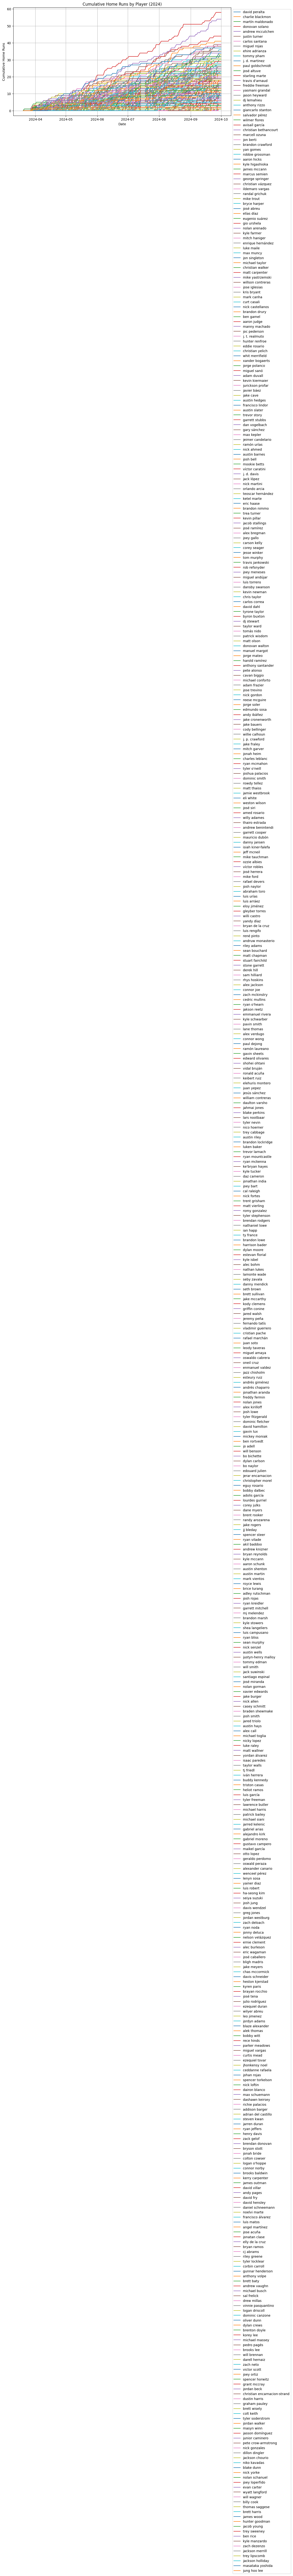

In [ ]:
# ============================
# 4) レギュラーシーズンだけ抽出 (game_type == 'R')
# ============================
if 'game_type' in df.columns:
    print("\n--- game_typeの内訳 ---")
    print(df['game_type'].value_counts(dropna=False))

    df = df[df['game_type'] == 'R']
    if df.empty:
        print("No regular season data ('R' in 'game_type') found.")
        sys.exit(1)
else:
    print("'game_type' column not found. Skipping filter by game_type.")

# ============================
# 5) ホームランイベント抽出
# ============================
df_hr = df[df['events'] == 'home_run']
if df_hr.empty:
    print("No home run events found in the (regular season) Statcast data.")
    sys.exit(1)

print("\n--- df_hr (Home Run data) ---")
print(df_hr.head())
print("df_hr shape:", df_hr.shape)

# ============================
# 6) 日付×batter でHR数を集計
# ============================
df_grouped = df_hr.groupby(['game_date', 'batter']).size().reset_index(name='HR')
print("\n--- df_grouped ---")
print(df_grouped.head())
print("df_grouped shape:", df_grouped.shape)

# ============================
# 7) ピボットテーブル作成
#    (index=ゲーム日, columns=選手ID, 値=HR数) + fillna(0)
# ============================
df_pivot = df_grouped.pivot(index='game_date', columns='batter', values='HR').fillna(0)
print("\n--- df_pivot (before reindex) ---")
print(df_pivot.head())
print("df_pivot shape:", df_pivot.shape)

# ============================
# 8) 全日付の補完 (欠損は0埋め)
# ============================
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot.sort_index(inplace=True)

# 2024-03-20 ~ 2024-10-01 の全日付を作り、ピボットテーブルを再インデックス
regular_season_dates = pd.date_range(start="2024-03-20", end="2024-10-01")
df_pivot = df_pivot.reindex(regular_season_dates, fill_value=0)

print("\n--- df_pivot (after reindex) ---")
print(df_pivot.head(10))  # 最初の10行をチェック
print(df_pivot.tail(5))

# ============================
# 9) 累積和 cumsum()
# ============================
df_cumsum = df_pivot.cumsum()

print("\n--- df_cumsum (after cumsum) ---")
print(df_cumsum.head(10))  # 最初の10行をチェック
print(df_cumsum.tail(5))
print("df_cumsum shape:", df_cumsum.shape)

# ============================
# 10) batter ID → 選手名変換
# ============================
name_mapping = {}
for batter_id in df_cumsum.columns:
    try:
        info = playerid_reverse_lookup([batter_id], key_type='mlbam')
        if not info.empty:
            full_name = f"{info['name_first'].values[0]} {info['name_last'].values[0]}"
        else:
            full_name = str(batter_id)
    except Exception as e:
        full_name = str(batter_id)
        print(f"Error looking up name for batter ID {batter_id}: {e}")
    name_mapping[batter_id] = full_name

df_cumsum.rename(columns=name_mapping, inplace=True)

# ============================
# 11) 折れ線グラフでざっと確認
# ============================
plt.figure(figsize=(12, 6))
for column in df_cumsum.columns:
    plt.plot(df_cumsum.index, df_cumsum[column], label=column)

plt.xlabel("Date")
plt.ylabel("Cumulative Home Runs")
plt.title("Cumulative Home Runs by Player (2024)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# ============================
# 12) Bar Chart Race の作成 (MP4出力)
# ============================
output_filename = 'hr_race_2024_with_names_full_year.mp4'
bcr.bar_chart_race(
    df=df_cumsum,
    filename=output_filename,  # MP4ファイル出力
    n_bars=10,
    period_fmt='%Y-%m-%d',
    title='2024 Cumulative Home Run Top 10 (Regular Season Only)',
    filter_column_colors=True,
)

print(f"\n動画ファイル '{output_filename}' の生成が完了しました。")

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local


動画ファイル 'hr_race_2024_with_names_full_year.mp4' の生成が完了しました。


In [ ]:
# ============================
# 13) 生成ファイルの存在確認 ＋ ノートブック上で再生
# ============================
print("\n=== ファイルの存在確認 ===")
!ls -lh | grep {output_filename} || echo "No such file: {output_filename}"

print("\n=== ノートブック上でMP4を再生 (埋め込み) ===")
try:
    display(Video(output_filename, embed=True))
except Exception as e:
    print(f"Could not display video: {e}")



=== ファイルの存在確認 ===
-rw-r--r-- 1 root root 2.0M Feb 22 13:40 hr_race_2024_with_names_full_year.mp4

=== ノートブック上でMP4を再生 (埋め込み) ===
